# Boundary vector score (BVS) - datajoint integration

Datajoint integration of bvs calculation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up basics
import sys, os
import numpy as np 
from collections import OrderedDict
# Make plots pretty 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

import datajoint as dj

In [3]:
# Load base schema
schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


### Schema components

In [8]:
from dj_schemas.bvs import *

In [9]:
(borderscore_schema.jobs & 'table_name LIKE "%%__b_v_score%%"').delete()

In [10]:
BVField().progress()

BVField              Completed 213972 of 213974 (100.0%)   2020-11-10 17:14:41


(2, 213974)

In [11]:
BVScore().progress()

BVScore              Completed 427934 of 427944 (100.0%)   2020-11-10 17:15:01


(10, 427944)

In [12]:
BVScore

dj_schemas.bvs.BVScore

### Shuffling

In [33]:
ShuffleParams()

"shuffle_params_id Parameter set ID, starting with A",number_shuffles Expected number of shuffles,"margin_seconds Margin in seconds at start, end of sync samples",break_seconds Break in seconds between sync samples (-> non-continuous sampling of sync stream)
A,500,2.0,0.5


In [13]:
from dj_schemas.shuffling_bvs import * 

In [14]:
ShuffledBVS.progress()

ShuffledBVS          Completed 35349 of 427944 (8.3%)   2020-11-10 17:15:21


(392595, 427944)

In [122]:
bvs_examples = BorderScore * BVScore & 'bvs > .75' & 'borderscore > .48' & 'signal_type = "spikes"' & 'map_params_id = "A"' & 'bv_field_dect_method = "opexebo"'
bvs_examples

metasession_name Meta session name (hash),session_order Order of session within meta sessions (zero index!),"session_name Session name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",signal_dataset 16 character hash,cell_id Cell ID,channel the channel that this trace comes from (ROI masks are always primary),"spike_filter_id Parameter set ID, starting with A",tracking_dataset 16 character hash,"trackingparams_id Parameter set ID, starting with A","s_t_params_id Parameter set ID, starting with A",signal_type Signal type (Fluorescence vs. Spikes),"map_params_id Parameter set ID, starting with A","field_params_id Parameter set ID, starting with A","border_params_id Parameter set ID, starting with A","bvfield_params_id Parameter set ID, starting with A",bv_field_dect_method Specifies how fields were extracted,borderscore Border Score,bvs Boundary vector score (BVS),orientation
010817cb5e4a1ae5,0,d6ba671faad74695,2defc4b09cb2ce57,28,primary,A,24a0025370060e41,A,A,spikes,A,A,A,A,opexebo,0.5701791603182815,0.7767137096774194,vertical
010817cb5e4a1ae5,0,d6ba671faad74695,2defc4b09cb2ce57,284,primary,A,24a0025370060e41,A,A,spikes,A,A,A,A,opexebo,0.5453628950450458,0.7686491935483871,horizontal
02b50b09ffe61c44,0,84f50041aa7d1c2d,f1229a823545b909,25,primary,A,e8cfc99c58702b71,A,A,spikes,A,A,A,A,opexebo,0.614391715375789,0.9235491071428571,vertical
02b50b09ffe61c44,0,84f50041aa7d1c2d,f1229a823545b909,96,primary,A,e8cfc99c58702b71,A,A,spikes,A,A,A,A,opexebo,0.6530362831250636,0.8392137096774194,vertical
02b50b09ffe61c44,0,84f50041aa7d1c2d,f1229a823545b909,188,primary,A,e8cfc99c58702b71,A,A,spikes,A,A,A,A,opexebo,0.5228298255157777,0.8412298387096774,horizontal
02b50b09ffe61c44,1,b1ebb90786d47fe2,f1229a823545b909,25,primary,A,c6adf71847b0759c,A,A,spikes,A,A,A,A,opexebo,0.50369990180031,0.7741935483870968,vertical
02b50b09ffe61c44,2,51b3b767123f3615,f1229a823545b909,93,primary,A,cfb6810c1d78319e,A,A,spikes,A,A,A,A,opexebo,0.5551952869546423,0.8177083333333334,horizontal
02b50b09ffe61c44,2,51b3b767123f3615,f1229a823545b909,94,primary,A,cfb6810c1d78319e,A,A,spikes,A,A,A,A,opexebo,0.6642271215906717,0.8541666666666666,horizontal
05304a7b5f0d845a,0,5b92b96313c3fc19,f4d17f63c87a245e,9,primary,A,f6ccd1b5e70262de,A,A,spikes,A,A,A,A,opexebo,0.4891889952030036,0.8311491935483871,horizontal
06cb131e4ab1693c,0,781a0bfe45661fd5,33fa4761f7fe4477,3,primary,A,e2ac08c9672b6c72,A,A,spikes,A,A,A,A,opexebo,0.5815029988243675,0.8364955357142857,vertical


Fetched 21 examples


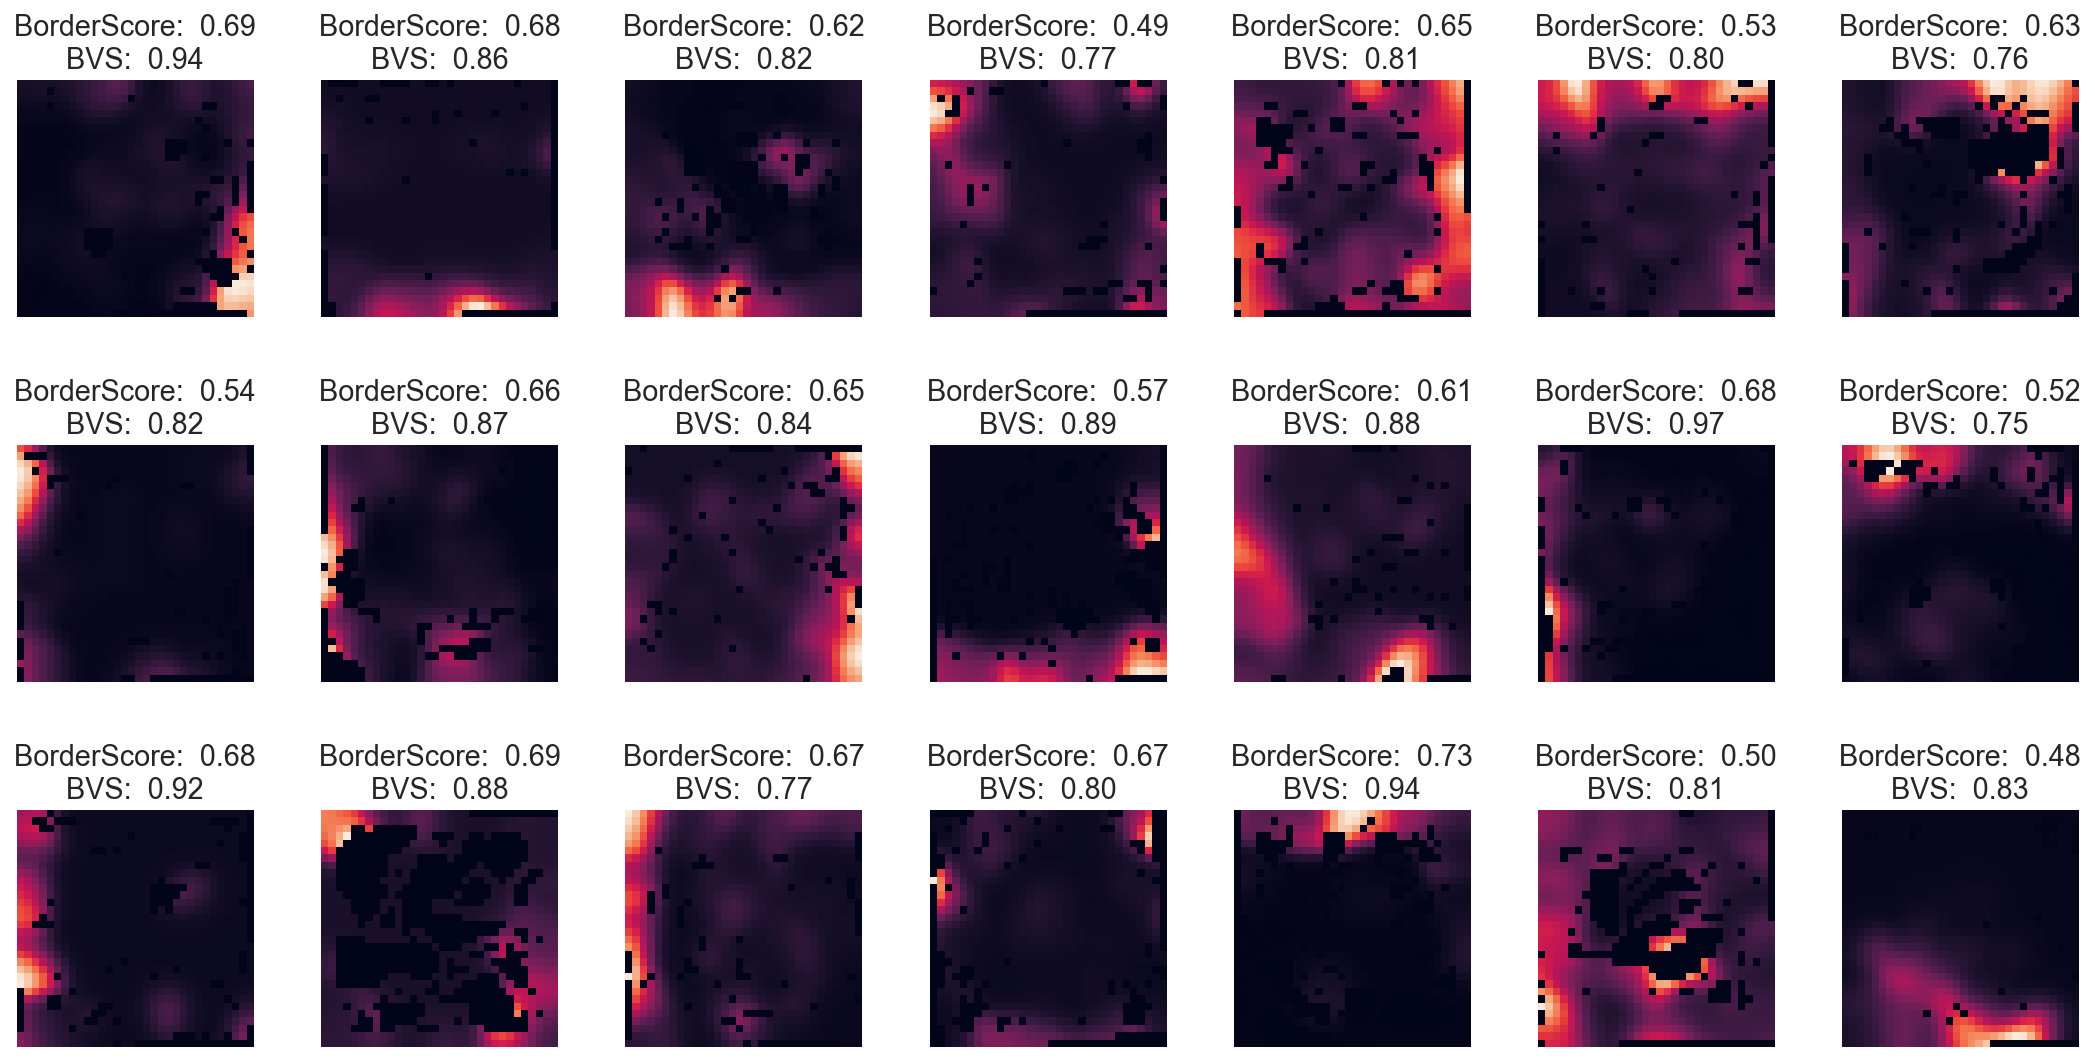

In [131]:
some_bvs = bvs_examples.fetch(limit=21, order_by='RAND()', as_dict=True)
print(f'Fetched {len(some_bvs)} examples')
figure = plt.figure(figsize=(15,8))
for no,rm in enumerate(some_bvs):
    ax = figure.add_subplot(3,7,no+1)
    bvs = rm['bvs']
    borderscore = (BorderScore & rm).fetch1("borderscore")
    ratemap_entry = (Ratemap & rm).fetch1()
    rm      = np.ma.array(ratemap_entry['ratemap'], mask = ratemap_entry['mask_rm'])
    rm_nans = np.ma.filled(rm, fill_value=-10).astype(np.float64)
    ax.imshow(rm_nans)
    ax.set_title(f'BorderScore:  {borderscore:.2f}\nBVS:  {bvs:.2f}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    sns.despine(left=True,bottom=True)
plt.tight_layout()

### Distributions

In [117]:
all_bvs = (BVScore  & 'signal_type = "spikes"' & 'map_params_id = "A"' & 'bv_field_dect_method = "opexebo"').fetch('bvs')
bvs_99, bvs_95 = (ShuffledBVS.BVS & 'signal_type = "spikes"' & 'map_params_id = "A"' & 'bv_field_dect_method = "opexebo"').fetch('bvs_99','bvs_95')

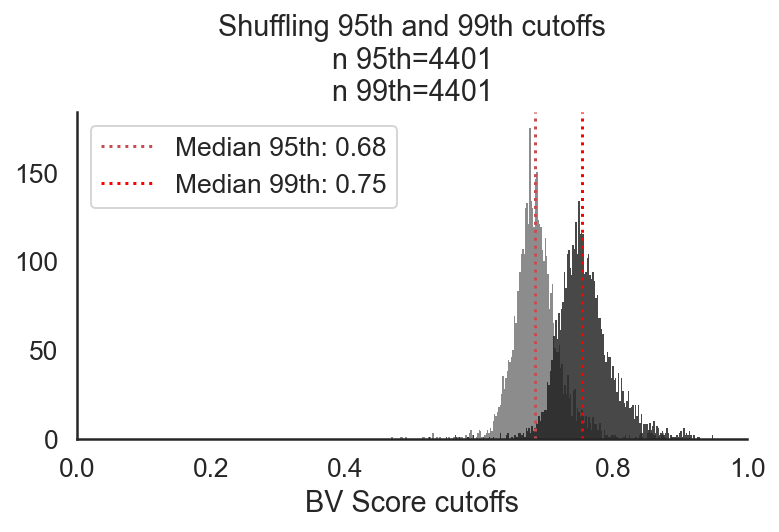

In [118]:
sns.set(style='white',font_scale=1.2)
figure = plt.figure(figsize=(6,3))
ax = figure.add_subplot(111)
ax.hist(bvs_95,bins=200, lw=0,color='k',alpha=.5);
ax.hist(bvs_99,bins=200, lw=0,color='k',alpha=.8);
median_95 = np.nanmedian(bvs_95)
median_99 = np.nanmedian(bvs_99)
ax.axvline(x=median_95,ls=':',color='r', label=f'Median 95th: {median_95:.2f}')
ax.axvline(x=median_99,ls=':',color='red', label=f'Median 99th: {median_99:.2f}')
ax.legend()
ax.set_xlim(0,1)
ax.set_xlabel('BV Score cutoffs')
ax.set_title(f'Shuffling 95th and 99th cutoffs\nn 95th={len(bvs_95)}\nn 99th={len(bvs_99)}')
sns.despine()

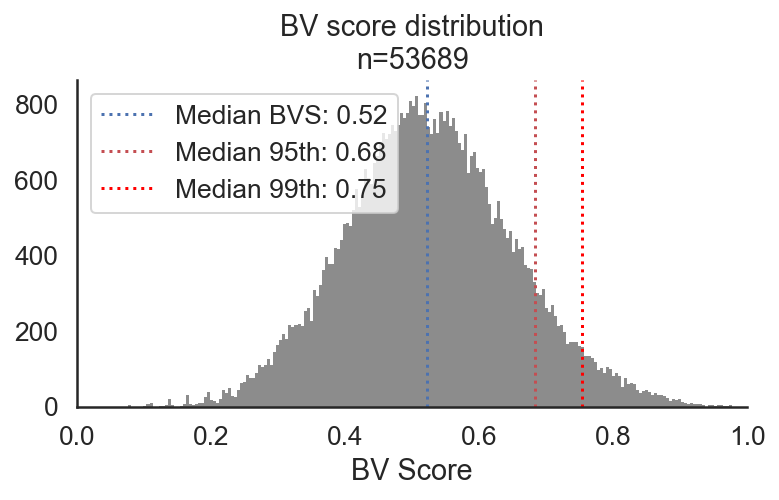

In [119]:
sns.set(style='white',font_scale=1.2)
figure = plt.figure(figsize=(6,3))
ax = figure.add_subplot(111)
ax.hist(all_bvs,bins=200, lw=0,color='k',alpha=.5);
median_bvs = np.nanmedian(all_bvs)
ax.axvline(x=median_bvs,ls=':',color='b', label=f'Median BVS: {median_bvs:.2f}')
ax.axvline(x=median_95,ls=':',color='r', label=f'Median 95th: {median_95:.2f}')
ax.axvline(x=median_99,ls=':',color='red', label=f'Median 99th: {median_99:.2f}')
ax.legend()
ax.set_xlabel('BV Score')
ax.set_title(f'BV score distribution\nn={len(all_bvs)}')
ax.set_xlim(0,1)
sns.despine()

### ... borderscore

In [98]:
all_borderscores = (BorderScore  & 'signal_type = "spikes"' & 'map_params_id = "A"').fetch('borderscore')
bordersc_99, bordersc_95 = (Shuffled.BorderScore & 'map_params_id = "A"').fetch('borderscore_99','borderscore_95')

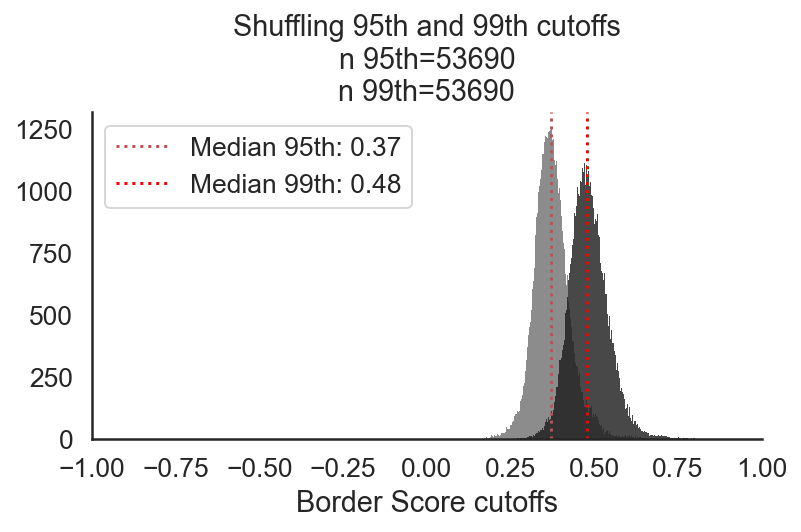

In [104]:
sns.set(style='white',font_scale=1.2)
figure = plt.figure(figsize=(6,3))
ax = figure.add_subplot(111)
ax.hist(bordersc_95,bins=200, lw=0,color='k',alpha=.5);
ax.hist(bordersc_99,bins=200, lw=0,color='k',alpha=.8);
median_95 = np.nanmedian(bordersc_95)
median_99 = np.nanmedian(bordersc_99)
ax.axvline(x=median_95,ls=':',color='r', label=f'Median 95th: {median_95:.2f}')
ax.axvline(x=median_99,ls=':',color='red', label=f'Median 99th: {median_99:.2f}')
ax.legend()
ax.set_xlim(-1,1)
ax.set_xlabel('Border Score cutoffs')
ax.set_title(f'Shuffling 95th and 99th cutoffs\nn 95th={len(bordersc_95)}\nn 99th={len(bordersc_99)}')
sns.despine()

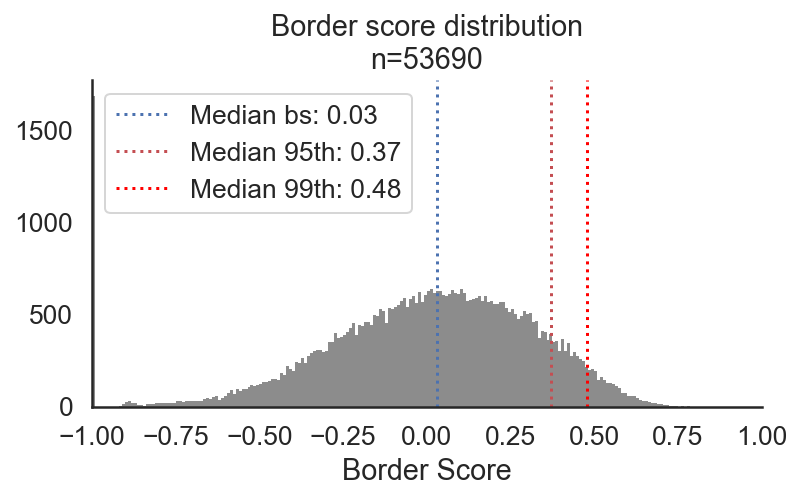

In [103]:
sns.set(style='white',font_scale=1.2)
figure = plt.figure(figsize=(6,3))
ax = figure.add_subplot(111)
ax.hist(all_borderscores,bins=200, lw=0,color='k',alpha=.5);
median_bs = np.nanmedian(all_borderscores)
ax.axvline(x=median_bs,ls=':',color='b', label=f'Median bs: {median_bs:.2f}')
ax.axvline(x=median_95,ls=':',color='r', label=f'Median 95th: {median_95:.2f}')
ax.axvline(x=median_99,ls=':',color='red', label=f'Median 99th: {median_99:.2f}')
ax.legend()
ax.set_xlabel('Border Score')
ax.set_title(f'Border score distribution\nn={len(all_bvs)}')
ax.set_xlim(-1,1)
sns.despine()

In [107]:
bs  = (BorderScore  & 'signal_type = "spikes"' & 'map_params_id = "A"')
bvs = (BVScore  & 'signal_type = "spikes"' & 'map_params_id = "A"' & 'bv_field_dect_method = "opexebo"')
combined = bs * bvs

In [109]:
all_bvs_, all_bs_ = combined.fetch('bvs','borderscore')

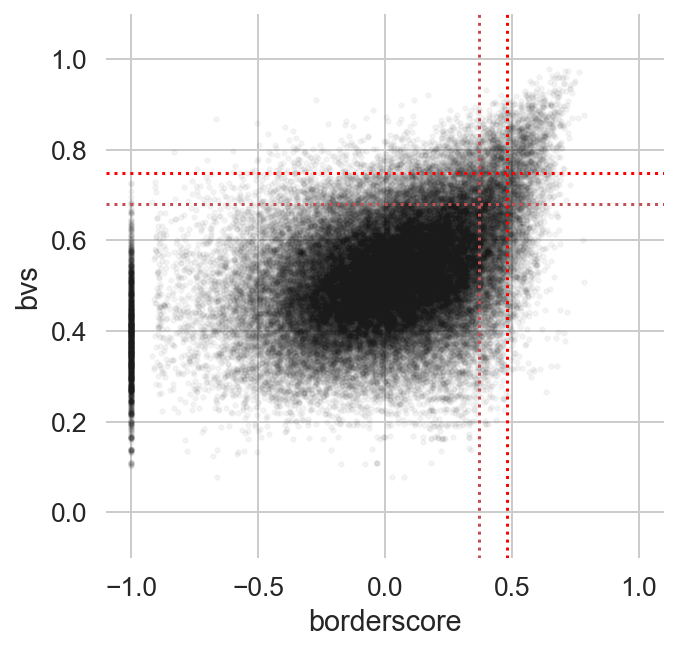

In [126]:
sns.set(style='whitegrid',font_scale=1.2)
figure = plt.figure(figsize=(5,5))
ax = figure.add_subplot(111)

ax.scatter(all_bs_, all_bvs_, s=5, color='k', alpha=.04)
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-.1,1.1)

# draw in cutoffs
ax.axvline(x=.37,ls=':',color='r')
ax.axvline(x=.48,ls=':',color='red')

ax.axhline(y=.68,ls=':',color='r')
ax.axhline(y=.75,ls=':',color='red')

ax.set_xlabel('borderscore')
ax.set_ylabel('bvs')
sns.despine(left=True,bottom=True)